In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from qtcodes import RepetitionQubit
from qiskit import QuantumCircuit, QuantumRegister
from qiskit_aer import Aer

In [2]:
qubit = RepetitionQubit()
qubit.stabilize()
qubit.stabilize()
# qubit.x()
qubit.readout_z()

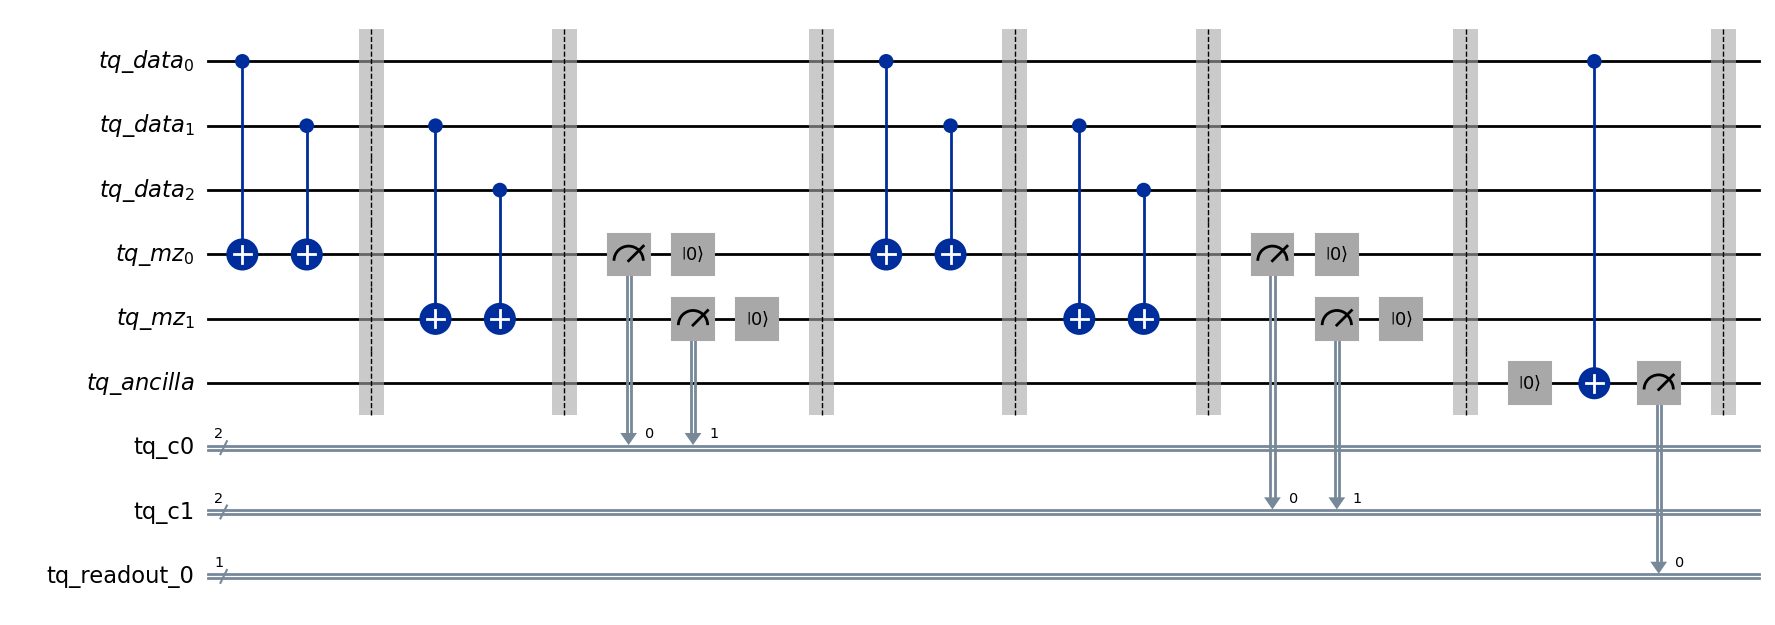

In [3]:
qubit.draw(output='mpl', fold=150)

In [5]:
qubit = RepetitionQubit({"d":3},"t")
qubit.stabilize()
qubit.circ.x(0)
qubit.stabilize()
qubit.circ.x(0)
qubit.readout_z()

results = Aer.get_backend('qasm_simulator').run(qubit.circ, shots=1).result().get_counts()
readout_string = list(results.keys())[0]
print("Readout String: ", readout_string)
logical_readout, syndromes = qubit.parse_readout(readout_string, "Z")
print("Logical Readout: ", logical_readout)
print("Syndromes: \n", syndromes)

Readout String:  0 01 00
Logical Readout:  0
Syndromes: 
 {'X': [], 'Z': [(0.0, 0.5, 0.5)]}


In [9]:
# make last round a lattice readout to get both readout and syndrome information
qubit = RepetitionQubit({"d":3},"t")
qubit.stabilize()
qubit.circ.x(0)
qubit.stabilize()
qubit.circ.x(0)
qubit.lattice_readout_z()

results = Aer.get_backend('qasm_simulator').run(qubit.circ, shots=1).result().get_counts()
readout_string = list(results.keys())[0]
print("Readout String: ", readout_string)
logical_readout, syndromes = qubit.parse_readout(readout_string, "Z")
print("Logical Readout: ", logical_readout)
print("Syndromes: \n", syndromes)

Readout String:  000 01 00
Logical Readout:  0
Syndromes: 
 {'X': [], 'Z': [(0.0, 0.5, 0.5), (1.0, 0.5, 0.5)]}


## |+>, X Readout, Z gates

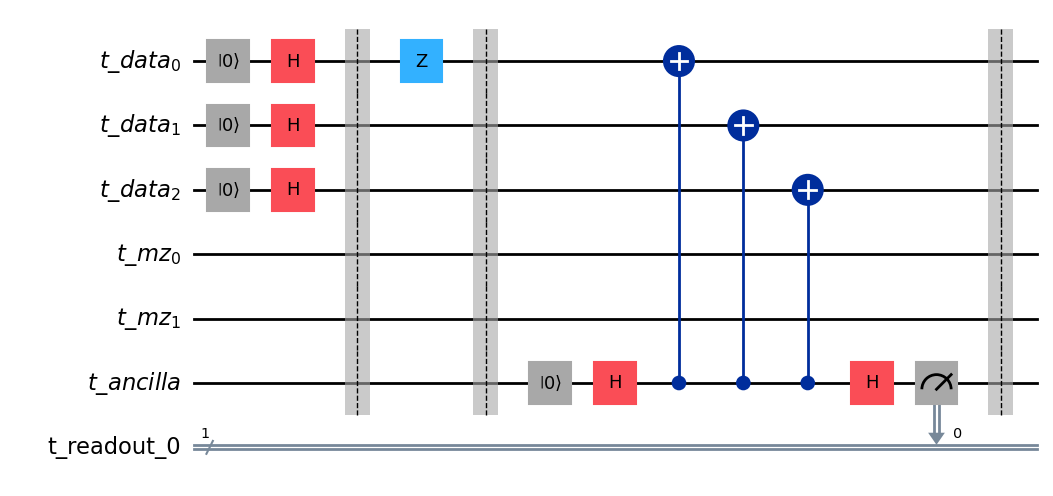

In [7]:
# starting in |+> and applying Z
qubit = RepetitionQubit({"d":3},"t")
qubit.reset_x()
qubit.z()
qubit.readout_x()
qubit.draw(output='mpl', fold=150)

In [8]:
Aer.get_backend('qasm_simulator').run(qubit.circ, shots=1).result().get_counts()

{'1': 1}